In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

excel_file_path = "../EDA/Titanic_EDA/train.csv"
df = pd.read_csv(
    excel_file_path, encoding="latin-1", usecols=["Age", "Fare", "Survived"]
)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [257]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [258]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [259]:
# filling nil values
mean = df["Age"].mean()
print(mean)
df["Age"].fillna(mean, inplace=True)

29.69911764705882


In [260]:
# preparing training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(["Survived"], axis=1),
    df["Survived"],
    test_size=0.2,
)
print(x_train.columns, x_test.columns)
x_train.skew()

Index(['Age', 'Fare'], dtype='object') Index(['Age', 'Fare'], dtype='object')


Age     0.434448
Fare    4.599180
dtype: float64

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


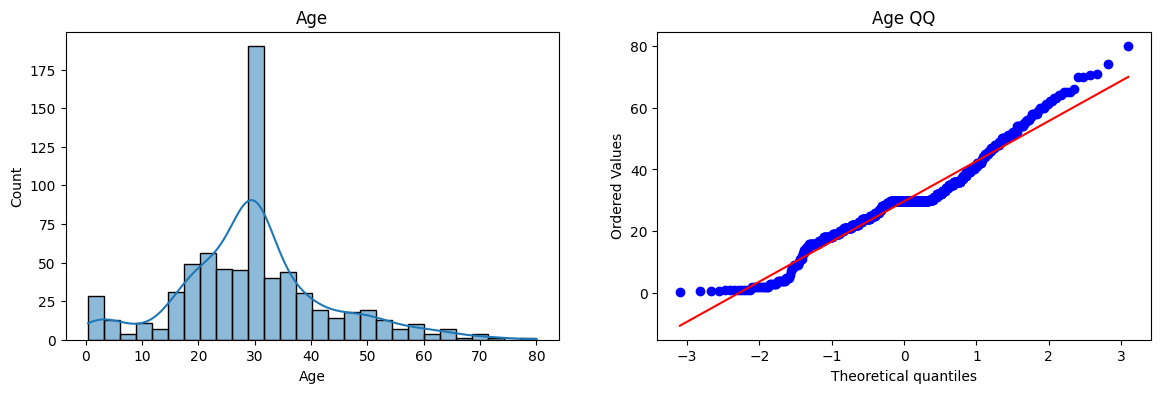

In [261]:
from scipy import stats


def show_graph(x_train_inp):
    # Age graph
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(x_train_inp, kde=True)
    plt.title("Age")
    plt.subplot(122)
    stats.probplot(x_train_inp, dist="norm", plot=plt)
    plt.title("Age QQ")
    plt.show()


show_graph(x_train["Age"])

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


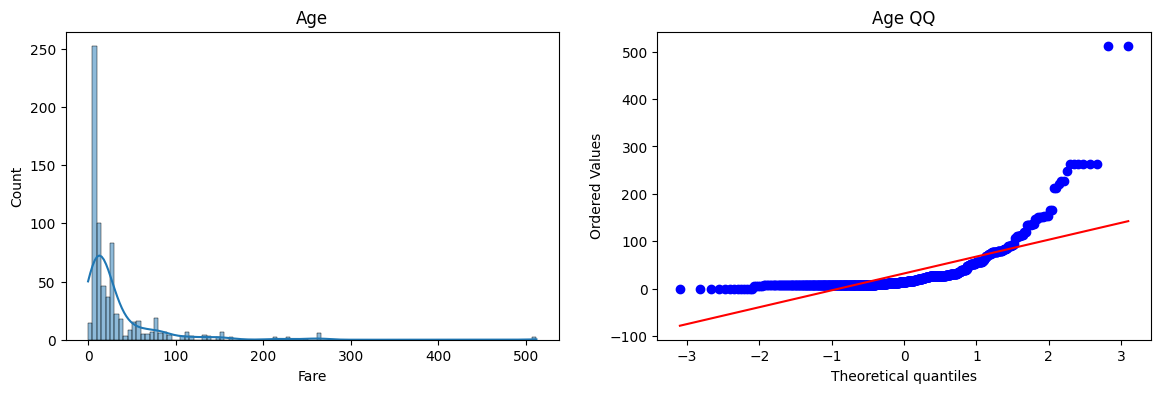

In [262]:
# Fare graph
show_graph(x_train["Fare"])

In [263]:
def calc_accuracy(x_train_inp, y_train_inp, x_test_inp, y_test_inp):
    clf = LogisticRegression()
    clf2 = DecisionTreeClassifier()

    clf.fit(x_train_inp, y_train_inp)
    clf2.fit(x_train_inp, y_train_inp)

    return (
        np.mean(
            cross_val_score(clf, x_test_inp, y_test_inp, scoring="accuracy", cv=10)
        )
    ), (
        np.mean(
            cross_val_score(clf2, x_test_inp, y_test_inp, scoring="accuracy", cv=10)
        )
    )

In [264]:
print(calc_accuracy(x_train, y_train, x_test, y_test))

(0.6261437908496732, 0.5529411764705883)


(0.6379084967320261, 0.5584967320261438)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


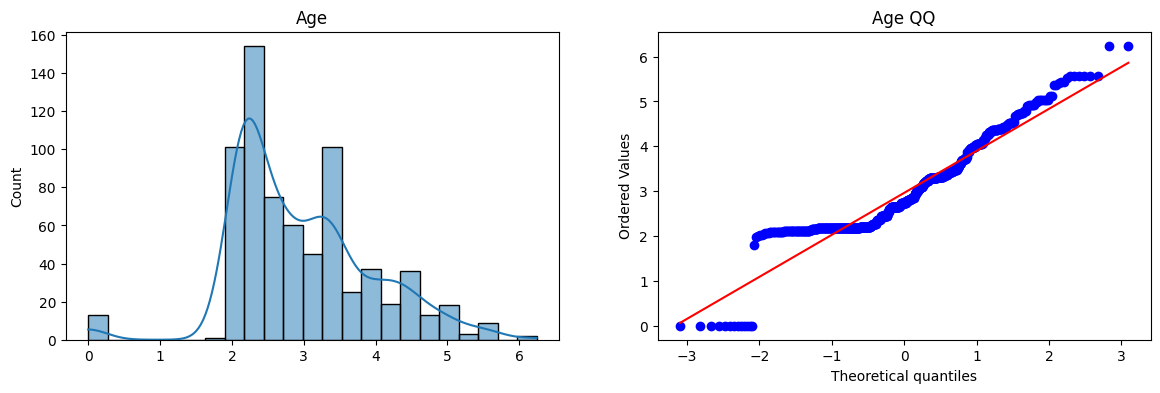

In [265]:
# The np.log1p function computes the natural logarithm of
# 1 plus the input array element-wise, which is useful for
# transforming skewed data or working with data that contains
# zero values.

# trf = FunctionTransformer(func=np.log1p)
trf = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)
print(calc_accuracy(x_train_trans, y_train, x_test_trans, y_test))
show_graph(x_train_trans[:,0]) # x_train_trans['Fare']
